# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of clain the been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answers and the script for the dashboard to your github. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


%matplotlib inline

In [2]:
tsa = pd.read_csv("tsa_claims_ujian.csv")

In [3]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
tsa.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
table =pd.DataFrame()
data = {'dataFeatures':[],'datatype':[],'null':[],'nullpct':[],'unique':[],'uniqueSample':[]}
list_=[]
for i in tsa:
    list_.append([i,
    tsa[i].dtypes,
    tsa[i].isna().sum(),
    round((tsa[i].isna().sum()/len(tsa)*100),2),
    tsa[i].nunique(),
    tsa[i].drop_duplicates().sample(2).values])
    
data=pd.DataFrame(list_,columns=['dataFeature','Type','null','null %','unique','unique sample'])

data

,dataFeature,Type,null,null %,unique,unique sample
0,Claim Number,object,0,0.00,51065,"[2006020701034, 2014092617062]"
1,Date Received,object,70,0.14,3522,"[1-Aug-07, 9-Jan-08]"
2,Incident Date,object,570,1.12,10788,"[1/18/2004 0:00, 6/4/2004 0:00]"
3,Airport Code,object,2052,4.02,405,"[GSN, CVG]"
4,Airport Name,object,2052,4.02,419,"[Harrison Marion Regional, Minneapolis/ St.Pau..."
5,Airline Name,object,8555,16.75,243,"[Mexicana, Westjet Airlines Ltd]"
6,Claim Type,object,1960,3.84,8,"[Motor Vehicle, Property Damage]"
7,Claim Site,object,190,0.37,6,"[nan, Checkpoint]"
8,Item,object,1012,1.98,1854,"[Cameras; Cameras; Personal Electronics, Cloth..."
9,Claim Amount,object,992,1.94,13248,"[$349.85 , $398.97 ]"


In [8]:
tsa.isna().sum()

Claim Number         0
Date Received       70
Incident Date      570
Airport Code      2052
Airport Name      2052
Airline Name      8555
Claim Type        1960
Claim Site         190
Item              1012
Claim Amount       992
Status               1
Close Amount     17280
Disposition      18220
dtype: int64

### If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [9]:
tsa.replace(to_replace='-',value = np.NaN,inplace=True)

In [10]:
tsa.isna().sum()

Claim Number         0
Date Received       70
Incident Date      570
Airport Code      2151
Airport Name      2151
Airline Name      9596
Claim Type        2031
Claim Site         249
Item              2148
Claim Amount      4180
Status            3189
Close Amount     17280
Disposition      18220
dtype: int64

### Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [11]:
tsa['Date Received']=pd.to_datetime(tsa['Date Received'])


In [12]:
a=tsa.copy()

In [13]:
for i in range(len(a)):
    try:
        pd.to_datetime(a['Incident Date'][i])
    except:
        a.at[i,'Incident Date'] = 'error'

In [14]:
a[a['Incident Date']=='error']

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,error,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,error,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,error,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,error,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,error,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,error,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,error,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,error,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,error,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,error,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


### For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [15]:
a.reset_index(inplace=True)


In [16]:
error=a[a['Incident Date']=='error']

In [17]:
error_idx=list(error['index'])
for i in error_idx:
    a= tsa['Incident Date'][i]
    b=tsa['Date Received'][i]
    date= str(a[:6]) + ' '+ str(b)[:4]
    tsa.at[i,'Incident Date'] = date 


In [18]:
pd.set_option('display.max_columns',1000)  # or 1000
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,2002-02-07,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,2002-06-20,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,2002-07-12,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,2002-08-21,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,2002-09-09,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2015-11-02,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,2015-11-16,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,2015-11-20,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN


for i in range(1,len(tsa['Incident Date'])):
    if len(str(tsa['Incident Date'][i]))>8:
        a = str(tsa['Incident Date'][i])
        a=a.split(' ')[0]
        b=a.split('/')
        c='{}.{}.{}'.format(b[2],b[0],b[1])
        print(c)
        #tsa.at[i,'Incident Date'] = a
  



In [19]:
tsa['Incident Date'] = pd.to_datetime(tsa['Incident Date'])


In [20]:
tsa


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN


### Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [21]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null datetime64[ns]
Incident Date    50496 non-null datetime64[ns]
Airport Code     48915 non-null object
Airport Name     48915 non-null object
Airline Name     41470 non-null object
Claim Type       49035 non-null object
Claim Site       50817 non-null object
Item             48918 non-null object
Claim Amount     46886 non-null object
Status           47877 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 5.1+ MB


In [22]:
tsa.iloc[error_idx]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
13729,2005021676300,2005-01-24,2005-05-17,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Other,$15.00,Approved,$15.00,Approve in Full
14323,2005031778682,2005-02-23,2005-02-17,MSY,New Orleans International,UAL,Passenger Property Loss,Checked Baggage,Computer - Laptop,$2;463.00,Denied,NaN,Deny
14856,2005033180821,2005-03-23,2005-03-07,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Cameras - Digital,$430.98,Approved,$430.98,Approve in Full
14976,2005040181143,2005-03-29,2005-03-04,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$151.00,Insufficient; one of the following items requi...,NaN,NaN
14995,2005040581540,2005-03-30,2005-03-18,MAF,Midland International Airport,Continental Express Inc,Passenger Property Loss,Checked Baggage,Locks,$10.60,Approved,$10.60,Approve in Full
15278,2005041282328,2005-04-12,2005-03-12,MSP,Minneapolis/ St.Paul International Airport,Northwest Airlines,Property Damage,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$710.00,Denied,$0.00,Deny
15934,2005051985030,2005-05-17,2005-05-01,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$197.73,Insufficient; one of the following items requi...,NaN,NaN
16813,2005071188622,2005-07-08,2005-07-01,HDN,Yampa Valley Regional,NaN,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$300.00,Denied,$0.00,Deny
17198,2005091492472,2005-08-01,2005-05-01,IAH,Houston - George Bush Intercontinental Airport,UAL,Passenger Property Loss,Checked Baggage,Other,$2;000.72,Denied,$0.00,Deny
19151,2005121397614,2005-12-08,2005-11-20,LNK,Lincoln Municipal,Northwest Airlines,Passenger Property Loss,Checked Baggage,Locks,$15.00,Approved,$15.00,Approve in Full


### Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [23]:
day_diff=[]
for i in range (len(tsa)):  
    day_diff.append((tsa['Date Received'][i])-(tsa['Incident Date'][i]))
    
tsa['Day Difference']=day_diff
tsa['Day Difference'] = tsa['Day Difference'].dt.days

### Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

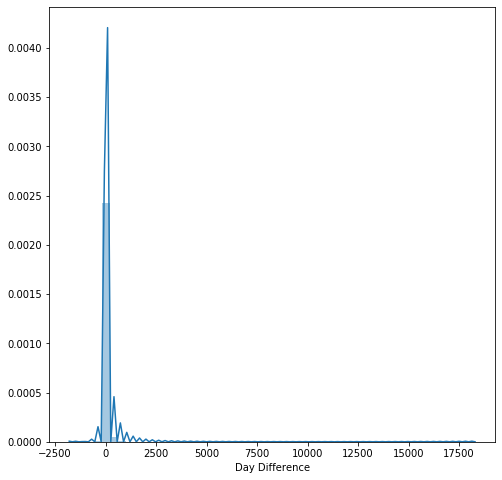

In [24]:
plt.figure(figsize=(8,8))
sns.distplot(tsa['Day Difference'].dropna())


### If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

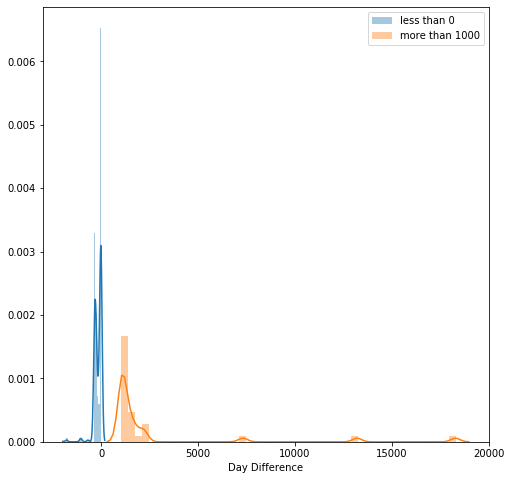

In [25]:
plt.figure(figsize=(8,8))

sns.distplot(tsa[tsa['Day Difference']<0]['Day Difference'],label = 'less than 0')
sns.distplot(tsa[tsa['Day Difference']>1000]['Day Difference'],label = 'more than 1000')
plt.legend()

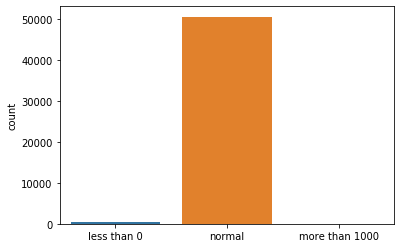

In [26]:
a=[]
for i in tsa['Day Difference']:
    if i <0:
        a.append('less than 0')
    elif i>1000:
        a.append('more than 1000')
    else:
        a.append('normal')
tsa['a']=a
sns.countplot(data=tsa,x =a)

## Question

### Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [27]:
tsa_1000=tsa[tsa['Day Difference']>1000]

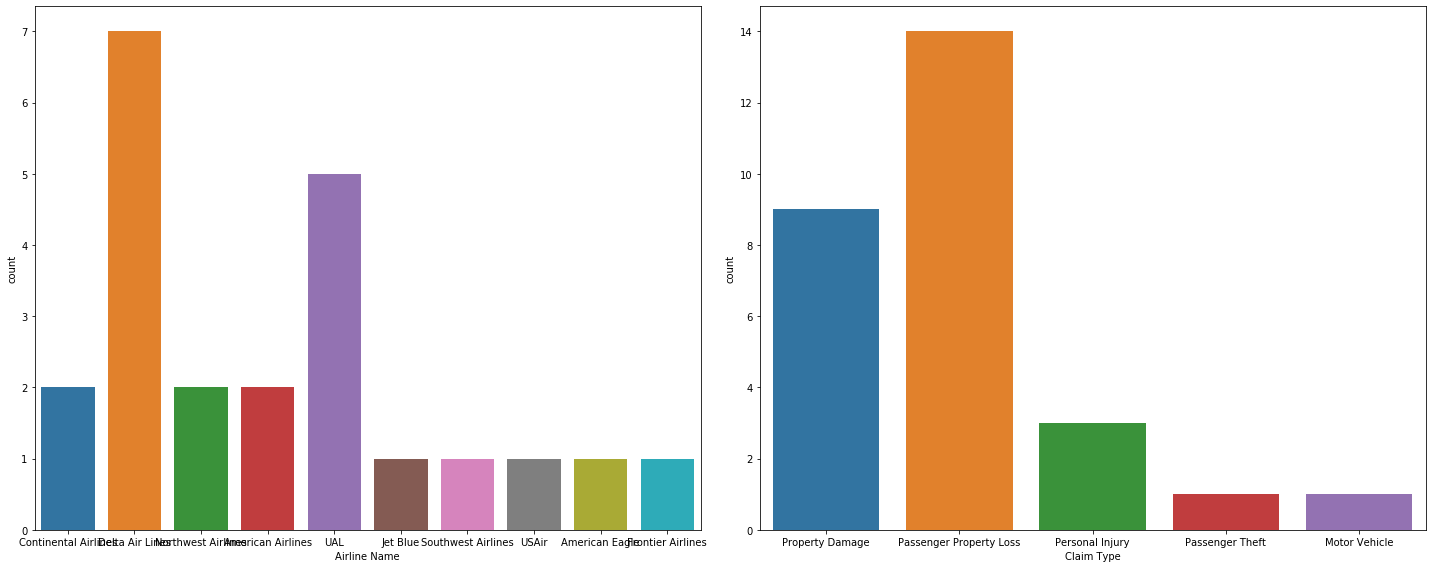

In [28]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(data=tsa_1000,x='Airline Name')

plt.subplot(1,2,2)
sns.countplot(data=tsa_1000,x='Claim Type')

plt.tight_layout()

In [29]:
tsa_1000


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,a
5727,1217135M,2003-12-17,2000-01-01 00:00:00,NaN,NaN,Continental Airlines,Property Damage,Checked Baggage,Other,$190.00,Settled,$90.00,Settle,1446.0,more than 1000
6885,0212302M,2004-02-12,2001-02-01 00:00:00,ATL,Hartsfield-Jackson Atlanta International Airport,Delta Air Lines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$65.00,Approved,$65.00,Approve in Full,1106.0,more than 1000
7257,0305106M,2004-03-05,2000-01-01 00:00:00,DTW,Detroit Metropolitan Wayne County Airport,Northwest Airlines,NaN,Checked Baggage,Clothing - Shoes; belts; accessories; etc.,$40.00,Approved,$40.00,Approve in Full,1525.0,more than 1000
9994,2004082661422,2004-07-19,2001-05-10 00:00:00,MCN,Middle Georgia Regional Airport,Delta Air Lines,Passenger Property Loss,Checked Baggage,Jewelry - Fine,$3;767.85,Closed as a contractor claim,$0.00,NaN,1166.0,more than 1000
10932,2004100464331,2004-09-09,2001-09-01 00:00:00,ORD,Chicago O'Hare International Airport,American Airlines,Passenger Property Loss,Checkpoint,Clothing - Shoes; belts; accessories; etc.,$30.00,Approved,$30.00,Approve in Full,1104.0,more than 1000
16208,2005061086208,2005-06-01,2002-04-30 00:00:00,FLL,Ft. Lauderdale-Hollywood International,Delta Air Lines,Passenger Property Loss,Checked Baggage,Other,$487.00,Settled,$243.50,Settle,1128.0,more than 1000
18767,2005112396390,2005-11-10,2000-11-03 00:00:00,JFK,John F. Kennedy International,NaN,Passenger Property Loss,Checkpoint,Jewelry - Fine,NaN,Insufficient; one of the following items requi...,NaN,NaN,1833.0,more than 1000
20800,2006041004307,2006-03-30,2003-03-04 00:00:00,SFO,San Francisco International,UAL,Property Damage,Checked Baggage,Luggage (all types including footlockers),$199.99,Closed as a contractor claim,$0.00,NaN,1122.0,more than 1000
20981,2006042505316,2006-04-13,2003-07-16 00:00:00,SEA,Seattle-Tacoma International,Delta Air Lines,Passenger Property Loss,Checkpoint,Jewelry - Fine,$5;015.00,Denied,$0.00,Deny,1002.0,more than 1000
21876,2006062608536,2006-06-23,2003-06-07 00:00:00,COS,Colorado Springs Municipal,American Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),$25.00,Denied,$0.00,Deny,1112.0,more than 1000


In [30]:
tsa_0=tsa[tsa['Day Difference']<0]
tsa_0


,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,a
0,0909816M,2002-02-07,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0,less than 0
12,0616624L,2002-09-30,2003-08-21 00:00:00,NaN,NaN,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$128.05,Denied,$0.00,Deny,-325.0,less than 0
113,0616756L,2002-12-03,2003-02-04 00:00:00,JAX,Jacksonville International,NaN,Passenger Property Loss,Checkpoint,Other,$120.00,Approved,$120.00,Approve in Full,-63.0,less than 0
343,0114002M,2003-01-14,2003-12-20 00:00:00,LAX,Los Angeles International Airport,American Airlines,NaN,Checked Baggage,Jewelry - Fine,$1;254.83,Denied,$0.00,Deny,-340.0,less than 0
350,0115048M,2003-01-15,2003-10-08 00:00:00,JAX,Jacksonville International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$49.99,Approved,$49.99,Approve in Full,-266.0,less than 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44380,2013011700003,2013-01-17,2013-01-17 07:00:00,ABQ,Albuquerque International Sunport Airport,NaN,Complaint,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,less than 0
44471,2013021501524,2013-01-29,2013-01-29 23:45:00,LAS,McCarran International,Delta Air Lines,Property Damage,Checked Baggage,Baggage/Cases/Purses,$0.00,Deny,NaN,NaN,-1.0,less than 0
44723,2013031202533,2013-03-05,2013-03-05 09:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Travel Accessories,NaN,NaN,NaN,NaN,-1.0,less than 0
45519,2013071805244,2013-06-26,2013-06-26 07:49:00,LAX,Los Angeles International Airport,NaN,Property Damage,Checked Baggage,NaN,NaN,NaN,NaN,NaN,-1.0,less than 0


In evaluating the Day Differences between the Incident Date and Date received, I found there to be some unique values that exceeded 1000. So I explored the data and brainstormed some reasons as to why this might've happened.

Most of the data's Claim type is from a Passengger Property Loss claim, which means that the Day Difference mightve exceeded 1000 days because it took them a long time to find the missing item. Or, maybe because airlines might have a minimum search period of a number of days before they can reimburst the cost for the missing item.

Additionally, when we look at the disposition of the claims, we can see that only some were approved in full, mostly the claims were either settled for a smaller amount of money or denied. This might mean that passengers who filed the claim did ot have supporting evidence to back their claim, which caused the airline to be hesitant to reimburst them since it might not have been their fault that the propert was damaged

Another reason why the Day difference > 1000 is because there might be poor administration from the airline that handles the claims. Most of the data whos Day difference>1000 belongs to Delta Air, showing that there might be a consistent pattern in its poor admin.

On the other hand there is also some data whose Day difference is less than 0. This might be possible because of an error in inputing the data into the system.

### Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [31]:
def split(x):
    if x != None:
        try:
            a = x.split('$')[1]
            if ';' in a:
                b = a.split(';')[0]
                c = a.split(';')[1]
                return float(str(b + c))
            return float(a)
        except:
            return float('nan')
    else:
        return float('nan')

In [32]:
tsa['Claim Amount'].isna().sum()

4180

In [33]:
tsa
a='$5;200'
#a.split('$')[1]
a=float('nan')
split(a)

nan

In [34]:
c=[]
d=[]
for i in tsa['Claim Amount']:
    c.append(split(str(i)))
for i in tsa['Close Amount']:
    d.append(split(i))
tsa['Claim Amount']=c
tsa['Close Amount']=d



#### Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [35]:

tsa['Amount Diff']=tsa['Claim Amount']- tsa['Close Amount']


In [36]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,a,Amount Diff
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,less than 0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,normal,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,normal,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,normal,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,normal,1832.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,normal,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,normal,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,normal,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,normal,NaN


### Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

In [37]:
tsa['Amount Diff'].isna().sum()

17596

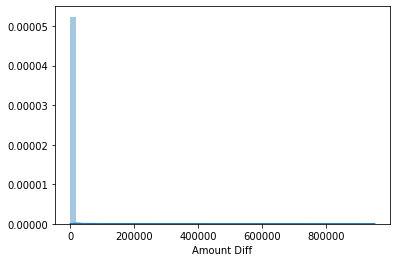

In [38]:
sns.distplot(tsa['Amount Diff'].dropna())

### There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that are outliers based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [39]:
tsa['Amount Diff'].describe()


count     33470.000000
mean        798.080448
std       12302.983486
min        -431.100000
25%           0.000000
50%          96.290000
75%         340.000000
max      951200.000000
Name: Amount Diff, dtype: float64

In [40]:
a = tsa['Amount Diff'].describe()
IQR = a['75%']-a['25%']
lower = a['25%']-(1.5*IQR)
upper = a['75%']+(1.5*IQR)
print('lower outlier = {} , upper outlier {}'.format(lower,upper))

lower outlier = -510.0 , upper outlier 850.0


In [41]:
tsa_outlier=tsa[tsa["Amount Diff"]>850]
tsa_outlier

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,a,Amount Diff
4,17846,2002-09-09,2002-08-30 00:00:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,10.0,normal,1832.22
13,19133,2002-10-02,2002-08-22 00:00:00,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,41.0,normal,2000.00
21,18614,2002-10-17,2002-09-14 00:00:00,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,33.0,normal,1400.00
23,18356,2002-10-23,2002-09-18 00:00:00,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,35.0,normal,1510.32
27,21817,2002-10-29,2002-10-05 00:00:00,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,24.0,normal,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,11.0,normal,2200.00
36210,2009123167017,2009-12-29,2009-12-02 15:30:00,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,26.0,normal,900.00
36213,2010010867323,2009-12-29,2009-12-21 15:15:00,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,7.0,normal,1240.00
36225,2009123066912,2009-12-30,2009-12-15 00:00:00,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,15.0,normal,2300.00


In [42]:
tsa_outlier['Claim Amount'].describe()

count      4103.000000
mean       5591.814389
std       34817.772854
min         851.010000
25%        1206.985000
50%        1812.050000
75%        3000.000000
max      951200.000000
Name: Claim Amount, dtype: float64

In [43]:
tsa_outlier['Close Amount'].describe()

count     4103.000000
mean       114.613646
std        686.521806
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

It seems that the Claim Amount really affects lot of the differences that happen as 75% outlier data that in the Close Amount is still 0.

## Question

I assume that many of this big differences happen because some people tend to request for a greater amount of money than what it should be. Do you agree or disagree with my assumption (that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [61]:
tsa_not=tsa[tsa["Amount Diff"]<=850]
tsa_not['Claim Amount'].describe()

count     29367.000000
mean        244.895947
std        1562.617320
min           0.000000
25%          52.990000
50%         139.990000
75%         300.000000
max      250000.000000
Name: Claim Amount, dtype: float64

In [62]:
tsa_outlier['Claim Amount'].describe()

count      4103.000000
mean       5591.814389
std       34817.772854
min         851.010000
25%        1206.985000
50%        1812.050000
75%        3000.000000
max      951200.000000
Name: Claim Amount, dtype: float64

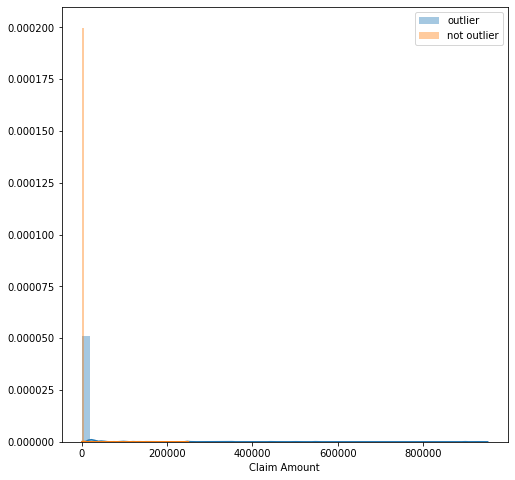

In [63]:
plt.figure(figsize=(8,8))
sns.distplot(tsa_outlier['Claim Amount'].dropna(),label = 'outlier')
sns.distplot(tsa_not['Claim Amount'].dropna(),label = 'not outlier')
plt.legend()

In [52]:
from scipy.stats import shapiro,normaltest,anderson

def try_normal(data):
    
    result = {'Anderson': {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])},'Shapiro p value':shapiro(data)[1],
               'K^2':normaltest(data)[1]}
    result ['Anderson']['stat'] =anderson(data)[0]
    return result


In [64]:
try_normal(tsa_outlier['Claim Amount'])

{'Anderson': {15.0: 0.575,
  10.0: 0.655,
  5.0: 0.786,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1315.4860273413924},
 'Shapiro p value': 0.0,
 'K^2': 0.0}

In [65]:
try_normal(tsa_not['Claim Amount'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 8141.234927112389},
 'Shapiro p value': 0.0,
 'K^2': 0.0}

In [66]:
from scipy.stats import levene
levene(tsa_not['Claim Amount'],tsa_outlier['Claim Amount'])

LeveneResult(statistic=413.3448035296802, pvalue=2.4460418856832615e-91)

In [67]:
from scipy.stats import mannwhitneyu as mw
mw(tsa_not['Claim Amount'],tsa_outlier['Claim Amount'])

MannwhitneyuResult(statistic=904086.5, pvalue=0.0)

In [73]:
fig2 = go.Figure(
        data=[go.Scatter(x=tsa_not['Close Amount'],
                         y=tsa_not['Claim Amount'],
                         mode='markers',
                         name='Not outlier'),
              go.Scatter(x=tsa_outlier['Close Amount'],
                         y=tsa_outlier['Claim Amount'],
                         mode='markers',
                         name='Outlier')],
        layout =dict(title=dict(text = 'Difference between Outlier and Not outlier')))
fig2

In [ ]:
sns.scatter(tsa_outlier,x='')

From the analysis above, we can see that the outlier and non outlier data have very different outcomes.

By dividing my data into outlier and not outlier, i evaluated the difference of the Claim amount that belongs to each category. Starting from the maximum and minimum,they appear to be very different. WIth the non outlier having a min of 0 and max of 250000, while the outlier data have a minimum of 851 and max of 951200. Then looking at their variances, I conducted the Levene test which resulted in different variance and Mann Whitney test that also supported the assumption that they are very different from each other since they hae different medians

Aside from that, we can also see from the Scatter plot above that the outlier data has smaller values of Closing amount and the Non outlier have closing amounts that even reach 250k. The lower values of Closing amount and higher value of Claim amount lead to an overall greater amount of 'amount difference' for the outlier daata

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

2. If you realize, there is many different classes in the Status and Disposition column. What pattern could you find in these 2 columns because of this classes variation? is there any relation with the other columns?

## 1.

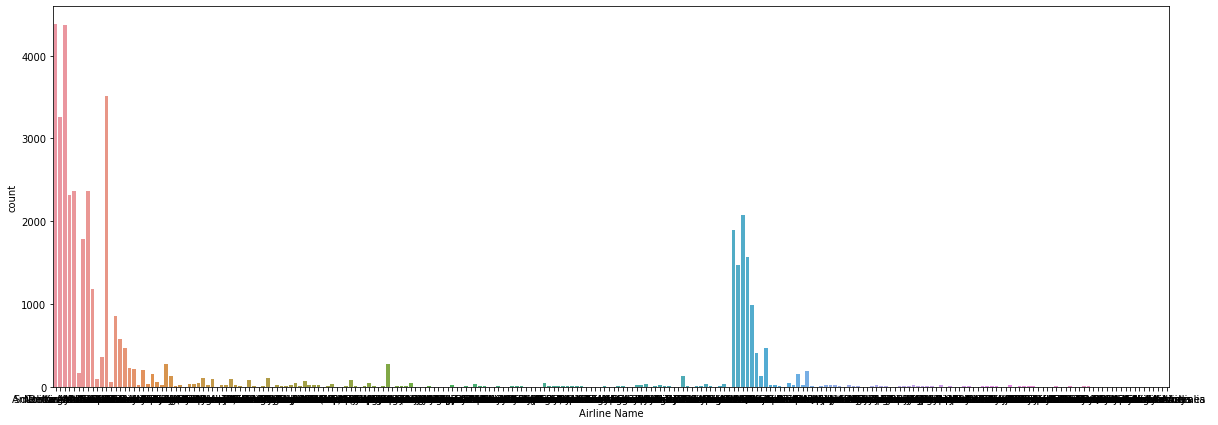

In [81]:
plt.figure(figsize=(20,7))
sns.countplot(data=tsa,x="Airline Name")
#American Airline

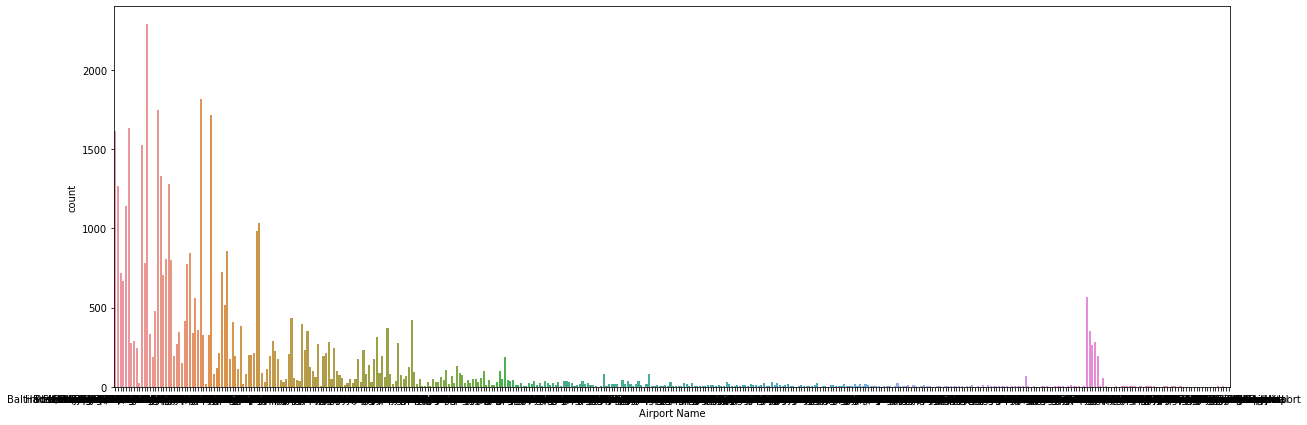

In [82]:
plt.figure(figsize=(20,7))

sns.countplot(data=tsa,x="Airport Name")
#JFK

In [90]:
tsa.groupby('Airline Name').describe(exclude='number')['Claim Type']

,count,unique,top,freq,first,last
Airline Name,,,,,,
ATA Aerocondor,109,3,Passenger Property Loss,86,NaN,NaN
Aer Lingus,26,3,Passenger Property Loss,16,NaN,NaN
Aero California,1,1,Property Damage,1,NaN,NaN
Aero Flot,14,2,Passenger Property Loss,13,NaN,NaN
Aero Mexico,40,2,Passenger Property Loss,24,NaN,NaN
...,...,...,...,...,...,...
Western Pacific Airlines Inc Westpac,3,1,Property Damage,3,NaN,NaN
Westjet Airlines Ltd,31,3,Passenger Property Loss,17,NaN,NaN
Westjet Airlines Ltd,50,2,Property Damage,26,NaN,NaN


In [92]:
a= tsa.groupby('Airport Name').describe(exclude='number')['Claim Type']

,count,unique,top,freq,first,last
Airport Name,,,,,,
Albert J Ellis; Jacksonville,2,2,Passenger Property Loss,1,NaN,NaN
Aberdeen Regional Airport,8,3,Passenger Property Loss,3,NaN,NaN
Abilene Regional,10,2,Property Damage,6,NaN,NaN
Abraham Lincoln Capital Airport; Springfield,4,2,Passenger Property Loss,3,NaN,NaN
Adak Mitchell Field Airport,1,1,Passenger Property Loss,1,NaN,NaN
...,...,...,...,...,...,...
Yeager; Charleston,18,2,Passenger Property Loss,9,NaN,NaN
Yellowstone,1,1,Passenger Property Loss,1,NaN,NaN
Yellowstone Regional,3,2,Passenger Property Loss,2,NaN,NaN


In [91]:
from scipy.stats import chisquare
chisquare()

In [101]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,a,Amount Diff
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,less than 0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,normal,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,normal,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,normal,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,normal,1832.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,normal,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,normal,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,normal,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,normal,NaN


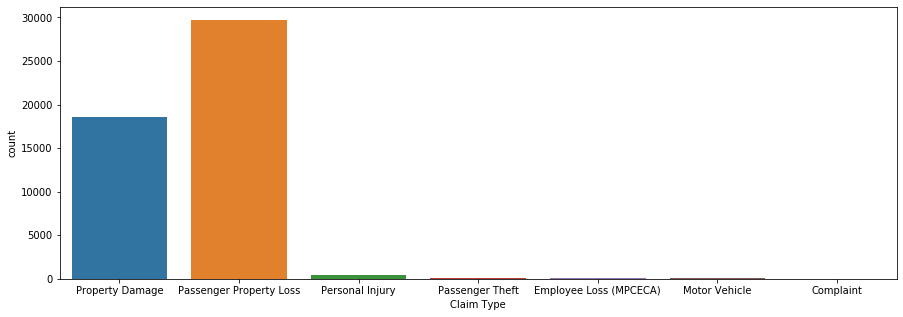

In [97]:
plt.figure(figsize=(15,5))
sns.countplot(tsa["Claim Type"])

In [105]:
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Difference,a,Amount Diff
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,-333.0,less than 0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,4.0,normal,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,42.0,normal,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,40.0,normal,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,10.0,normal,1832.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,2015-10-22,2015-10-19,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN,3.0,normal,NaN
51062,2015110226479,2015-11-02,2015-11-02,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN,0.0,normal,NaN
51063,2015120727336,2015-11-16,2015-09-14,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN,63.0,normal,NaN
51064,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0,normal,NaN


In [120]:
nan=tsa[tsa['Claim Type'].isna()]
nan[nan['Claim Amount'].isna()]


array(['Denied', 'Approved', 'Settled',
       'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.',
       'Canceled', 'Closed as a contractor claim', 'Claim entered', nan,
       'Deny', 'Settle', 'Approve in Full'], dtype=object)

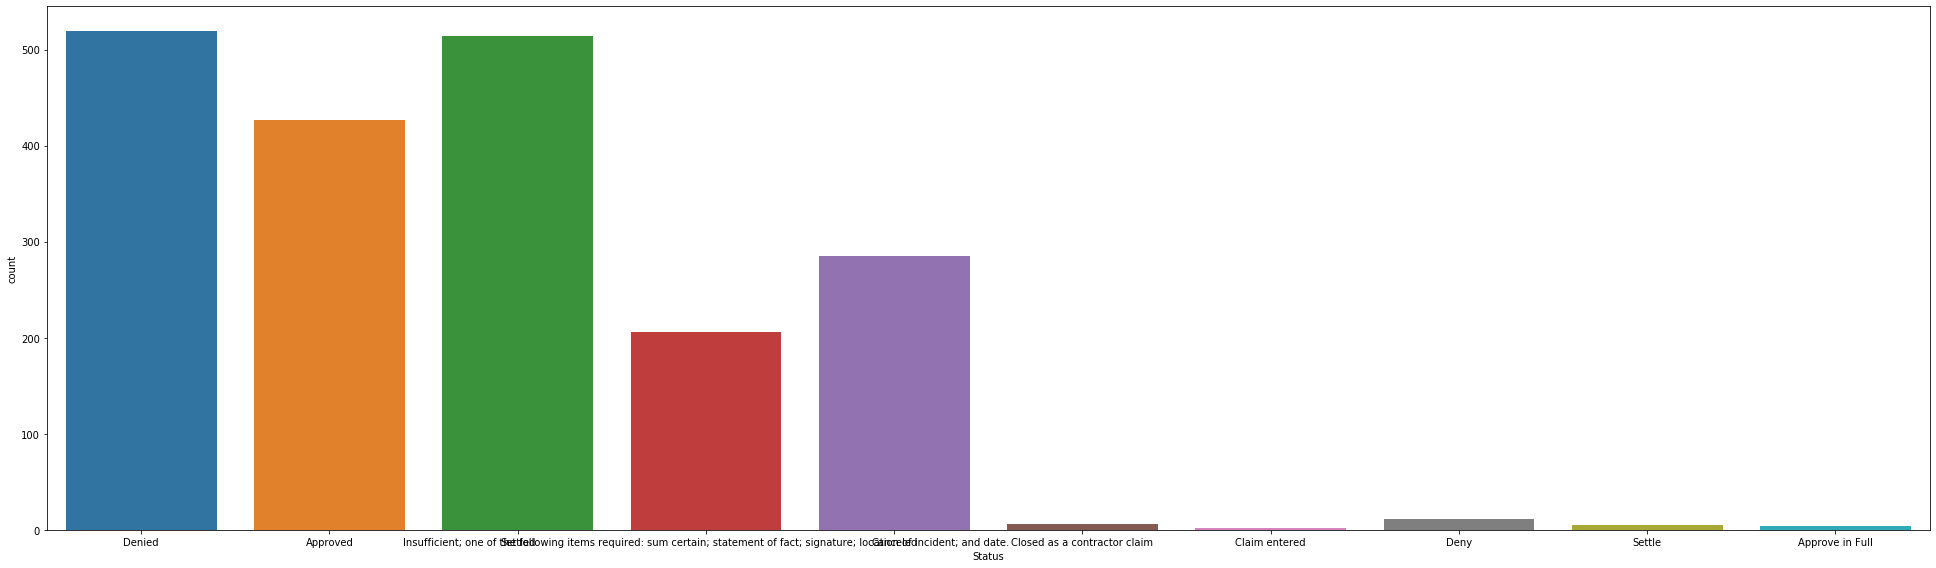

In [126]:
plt.figure(figsize=(27,8))
sns.countplot(nan['Status'])
plt.tight_layout()

In [112]:
nan=tsa[tsa['Claim Type'].isna()]
nan['Airline Name'].describe()
#sns.countplot(nan['Airport Name'])

count                  1028
unique                   57
top       American Airlines
freq                    166
Name: Airline Name, dtype: object

In [114]:
nan['Airport Name'].describe()


count                                  1484
unique                                  154
top       Los Angeles International Airport
freq                                     99
Name: Airport Name, dtype: object

There is no obvious relationship between airport name/airline name and the claim type as they are both categorical data so it is difficult to find a relationship. But from the grpahs above, we know that Most TSA Claims come from the JFK Airport and from American Airlines. While the tables also show the most common type of claims in each airline and each airport. Overall, most of the claims are Passenger property loss claims or Property Damage Claims. 

But there are also claims with NaN as their Claim type. This might be because this dataframe only gives 7 unique claim types, there are many other complaints that could be filed against the TSA, especially those that does not involved payment, because out of the 2000 data that has 'Nan' Claim mtype, 700 of them do not have a Claim amount. Many of them also have insufficient Status meaning that the claim was never completely filed which could also be why their claim type is Nan

## 2. 

In [169]:
for i in range(len(tsa)):
    if tsa['Status'][i] == 'Insufficient; one of the following items required: sum certain; statement of fact; signature; location of incident; and date.':
        tsa.at[i,'Status'] = 'Insufficient Info' 


In [170]:
tsa['Status'].unique()

array(['Approved', 'Canceled', 'Denied', 'Settled', 'In litigation',
       'Insufficient Info', 'Closed as a contractor claim', 'In review',
       'Claim entered', 'Deny', nan, 'Settle', 'Approve in Full'],
      dtype=object)

In [186]:
tsa['Disposition'].unique()

array(['Approve in Full', nan, 'Deny', 'Settle'], dtype=object)

In [187]:
tsa.groupby('Disposition').describe(exclude='number')['Status']

,count,unique,top,freq,first,last
Disposition,,,,,,
Approve in Full,8727,4,Approved,8724,NaN,NaN
Deny,17147,5,Denied,17125,NaN,NaN
Settle,6972,2,Settled,6970,NaN,NaN


In [188]:
tsa.groupby('Status').describe(exclude='number')['Disposition']

,count,unique,top,freq,first,last
Status,,,,,,
Approve in Full,0,0,NaN,NaN,NaN,NaN
Approved,8724,1,Approve in Full,8724,NaN,NaN
Canceled,5,3,Settle,2,NaN,NaN
Claim entered,0,0,NaN,NaN,NaN,NaN
Closed as a contractor claim,0,0,NaN,NaN,NaN,NaN
Denied,17125,1,Deny,17125,NaN,NaN
Deny,0,0,NaN,NaN,NaN,NaN
In litigation,16,2,Deny,15,NaN,NaN
In review,1,1,Deny,1,NaN,NaN


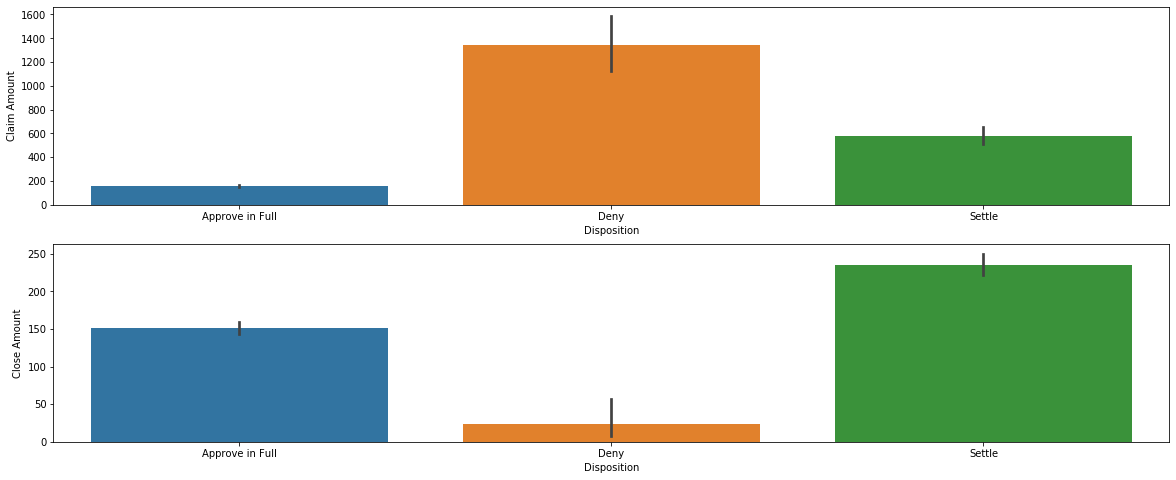

In [191]:
plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
sns.barplot(x='Disposition',y='Claim Amount',data=tsa)

plt.subplot(2,1,2)
sns.barplot(x='Disposition',y='Close Amount',data=tsa)


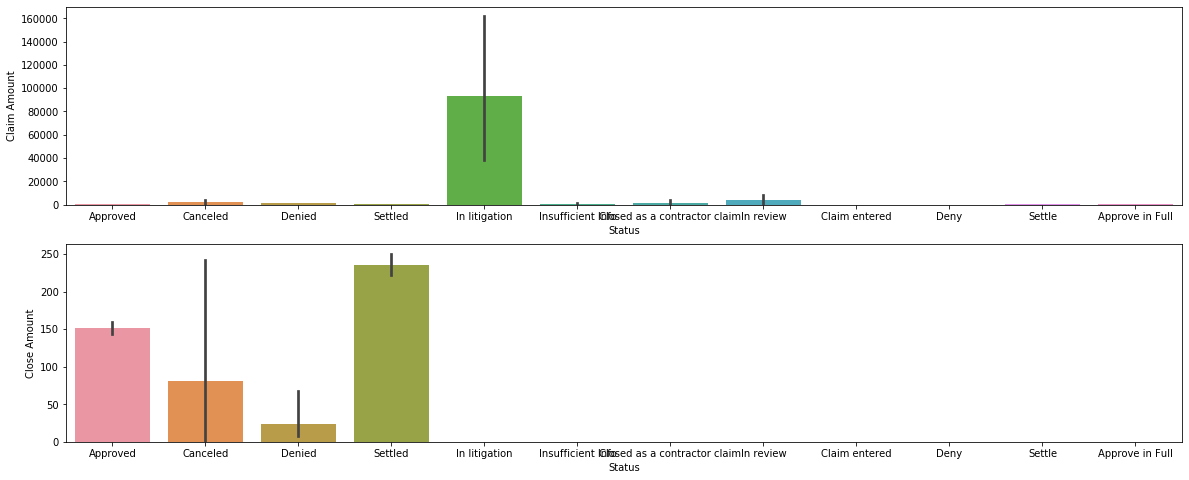

In [192]:
plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
sns.barplot(x='Status',y='Claim Amount',data=tsa)

plt.subplot(2,1,2)
sns.barplot(x='Status',y='Close Amount',data=tsa)


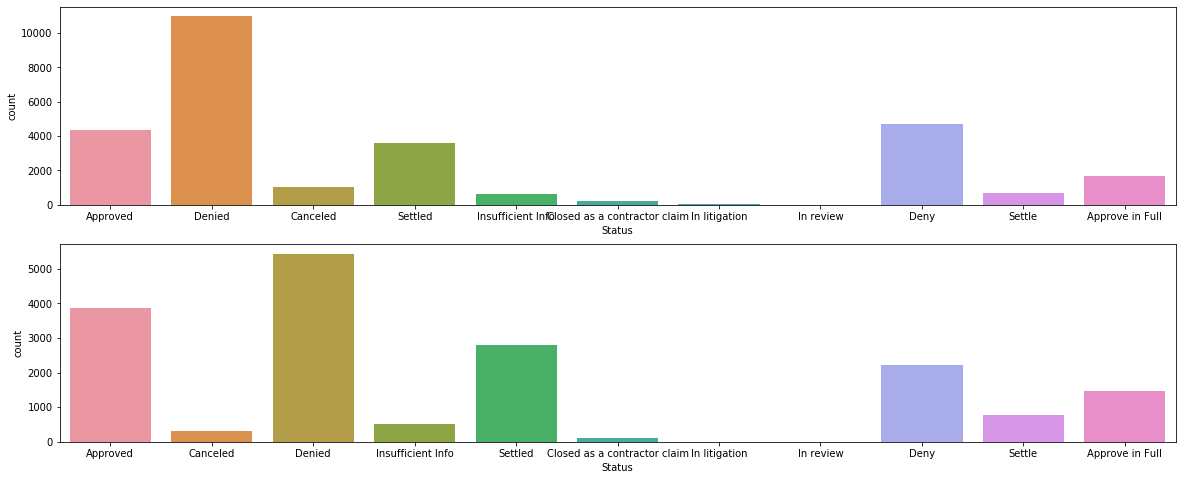

In [197]:
plt.figure(figsize=(20,8))


plt.subplot(2,1,1)
sns.countplot(tsa[tsa['Claim Type']=='Passenger Property Loss']['Status'])

plt.subplot(2,1,2)
sns.countplot(tsa[tsa['Claim Type']=='Property Damage']['Status'])


#sns.countplot(tsa[tsa['Claim Type']=='Employee Loss']['Status'])

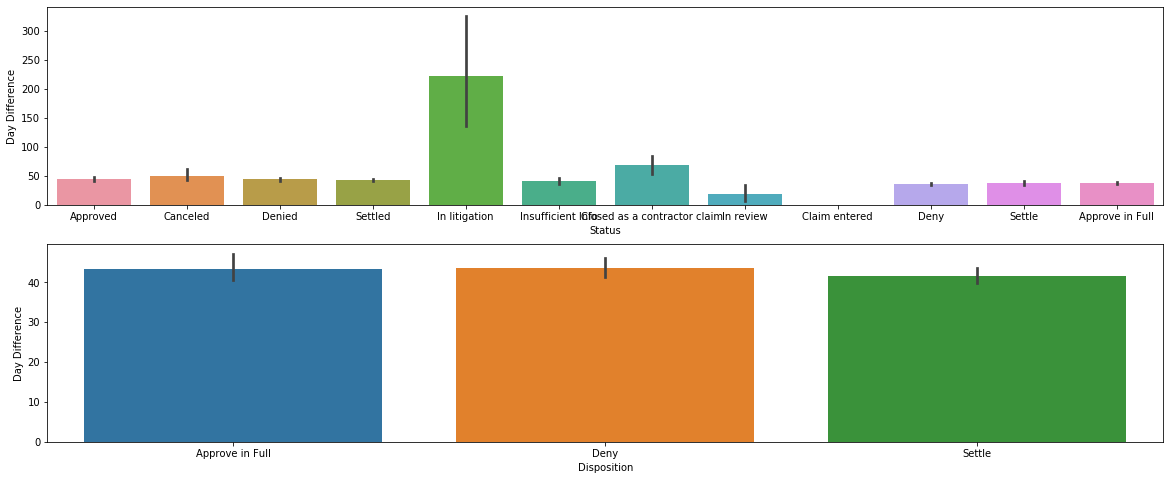

In [196]:
plt.figure(figsize=(20,8))

plt.subplot(2,1,1)
sns.barplot(x='Status',y='Day Difference',data=tsa)

plt.subplot(2,1,2)
sns.barplot(x='Disposition',y='Day Difference',data=tsa)

Generally, Status and Disposition arent that different. They both give the outcome of the Claim or the stage in which they are in the chain of process. Disposition give a more broad data (Approve, Deny or Settle) while Status gives a more specific stage of process that the claim is at. As seen in the table grouped by Disposition, we see that the top value of Status is actually the same as the value of Disposition. Because of this, they are actually quite related.

When looking at their relation to Claim amounts, we can see thaat the Status that the highest CLaim amouunt is in 'in Litigation', while in Disposition it is in 'Deny'. This could mean that the highest amount of claims were made when the claim had to go through litigation, but eventually was Denied.

While the highest Close amounts can be found in 'Settle' for both Status and Disposition. This would mean that highest closing claims were made when the party that made the claim negotiated with the TSA to find common ground. 

As for Claim types, I only looked into 2 of the most filed claim types in relation to the Status. I found that both claim types (passenger property loss, and property damage) were most likely to be denied. although it is more often that a passenger property loss claim is denied, rather than a property damage claim. This might be because the TSA does not take responsibility for missing items.

Lastly I compared the Day Difference between the Status and Dispositions. I found that the 'In Litigation' Status takes the longest to process and all the 'Disposition' values take the same time to process. The 'In Litigation' mightve taken the longest because 'In Litigation' means that it has to undergo some investigations which might take some time


In [198]:
tsa.to_csv('datatsa.csv',index=False)

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data

To create our dashboard, lets use only the data that was not outlier according to the Amount Differences. As we did not process all the NaN, just drop all those NaN. Save the file as 'tsa_claims_dashboard_ujian.csv', don't include the Index. As we don't want to have too much data in our dashboard, let's just sample 1000 data from our current data.

Also, set the random seed to 101.

In [47]:
np.random.seed(101)

Export the data to your SQL database, and try to connect the database to the dashboard